# Problem Sheet 1.2 - Crude Monte Carlo for integration

The purpose of this practical is just to get used to random number generation within your preferred language, and try out a few basic things from lectures 1-4. This notebook is written specifically for Python.

Please work on this as a group of 3 or 4 , and hand in an archive file (`.tar` or `.zip`) with i) your code(s), ii) your results as a PDF file with comments on anything you think is interesting.

In [9]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
%matplotlib inline

Let $U$ be uniformly distributed on $[0,1]$. You are to use Monte Carlo simulation to estimate the value of

$$\bar{f}=\mathbb{E}[f(U)]=\int_{0}^{1} f(U) \mathrm{d} U,$$
where

$$f(x)=x \cos \pi x.$$

**Part (a):** Calculate analytically the exact value for $\bar{f}$ and

$$\sigma^{2}=\mathbb{E}\left[(f(U)-\bar{f})^{2}\right]=\int_{0}^{1}(f(U)-\bar{f})^{2} \mathrm{~d} U$$


**Solution:** We note by integration by part,
$$\bar{f} = \int_0^1 x \cos \pi x \, dx = \left[ \frac{x \sin \pi x}{\pi}\right]_0^1 - \int_0^1 \frac{x \sin \pi x}{\pi} \, dx = \left[\frac{\cos \pi x}{\pi^2} \right]_0^1 = -\frac{2}{\pi^2}.$$

Moreover, we have
\begin{aligned}
\int_0^1 x^2 \cos^2 \pi x &= \int_0^1 \left( x^2 + \frac{1}{2}x^2 \cos 2\pi x \right) \, dx \\
&= \frac{1}{6} + \frac{1}{2} \left( \left[x^2 \frac{\sin 2\pi x}{2\pi} \right]_0^1 - \int_0^1 (2x) \frac{\sin 2\pi x}{2\pi} \, dx \right) \\
&= \frac{1}{6} - \frac{1}{2\pi} \left(\left[-x\frac{\cos 2\pi x}{2\pi} \right]_0^1 - \int_0^1 \frac{-\cos 2\pi x}{2\pi} \, dx \right) \\
&= \frac{1}{6} + \frac{1}{4\pi^2}.
\end{aligned}

Therefore,
$$\sigma^2 = \mathbb{E}[(f(U))^2] - \bar{f}^2 = \frac{1}{6} + \frac{1}{4\pi^2} - \frac{4}{\pi^4}.$$

In [10]:
f_bar = -2/np.pi**2
sigma = np.sqrt(1/6 + 1/(4*np.pi**2) - 4/np.pi**4)

**Part (b):** Write a program which to compute

$$Y_{m}=N^{-1} \sum_{n=1}^{N} f\left(U^{(m, n)}\right)$$

for 1000 **different** sets of 1000 independent random variables $U^{(m, n)}$.

In [3]:
sample = []

for _ in tqdm(range(1000)):
    u_arr = np.random.rand(1000)
    y = np.mean(u_arr * np.cos(np.pi * u_arr))
    sample.append(y)

100%|██████████| 1000/1000 [00:00<00:00, 46867.40it/s]


**Part (c):** Sort the $Y_{m}$ into ascending order, and then plot $C_{m}=(m-1 / 2) / 1000$ versus $Y_{m}$ - this is the numerical cumulative distribution function.

Superimpose on the same plot the cumulative distribution function you would expect from the Central Limit Theorem, and comment on your results.

You may like to experiment by trying larger or smaller sets of points to improve your understanding of the asymptotic behaviour described by the CLT.

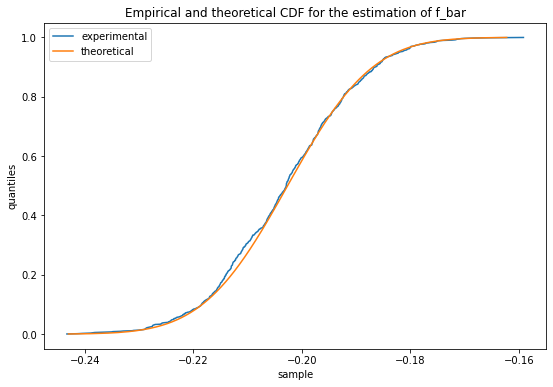

In [18]:
sample = np.sort(np.array(sample))
c_vec = (np.arange(1,1001) - 1/2)/1000
theoretical_x = norm(loc=f_bar, scale=sigma/np.sqrt(1000)).ppf(c_vec)

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(sample, c_vec, label="experimental")
ax.plot(theoretical_x, c_vec, label="theoretical")
ax.set_xlabel("sample")
ax.set_ylabel("quantiles")
ax.set_title("Empirical and theoretical CDF for the estimation of f_bar")
ax.legend()


One could therefore see that the empirical distribution is close to the desired CDF of a normal distribution (with mean and variances computed above) from the Central limit theorem. We could also illustrate uniform convergence (i.e. Berry-Esseen theorem) by approximating the supremum distance between the empirical and desired CDF, but this is beyond the scope.

**Part (d):** Modify your code to use a single set of $10^{6}$ random numbers, and plot

$$Y_{N}=N^{-1} \sum_{n=1}^{N} f\left(U^{(n)}\right)$$

versus $N$ for $N=10^{3}-10^{6}$. This should demonstrate the convergence to the true value predicted by the Strong Law of Large Numbers.

For each $N$, also compute an unbiased estimate for the variance $\sigma^{2}$ and hence add to the plot upper and lower confidence bounds based on 3 standard deviations of the variation in the mean.

Add a line corresponding to the true value (in red). It has been verified that the red line is inside the confidence region.

In [46]:
np.random.seed(1234)

# first getting a sample of f(U)
u_arr = np.random.rand(10**6)
f_arr = u_arr * np.cos(np.pi * u_arr)

# getting samples for Y_N for different N
sample_y = []
sample_std = []
sample_pt = np.logspace(3,6,100).astype(int)

for N in tqdm(sample_pt):
    sample_y.append(f_arr[0:N].mean())
    sample_std.append(f_arr[0:N].std(ddof=1))

100%|██████████| 100/100 [00:00<00:00, 3443.18it/s]


In [47]:
# post_processing for plots
sample_y = np.array(sample_y)
sample_std = np.array(sample_std)
sample_lower = sample_y - 3*sample_std/np.sqrt(sample_pt)
sample_upper = sample_y + 3*sample_std/np.sqrt(sample_pt)

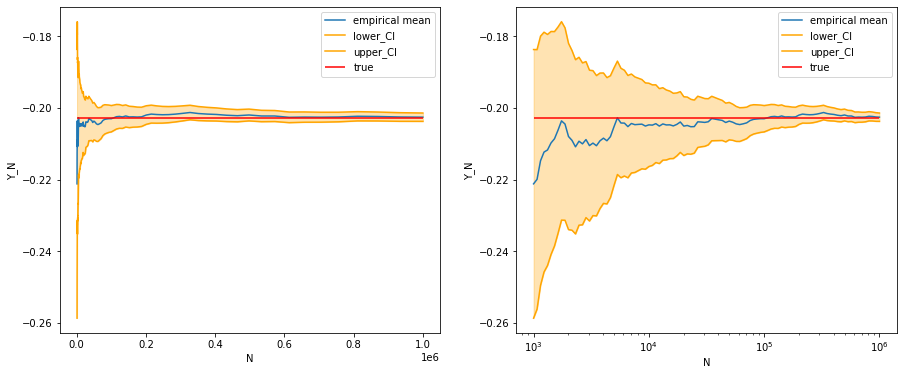

In [49]:
# plotting figures
fig, ax = plt.subplots(ncols = 2, figsize=(15,6))
ax[0].plot(sample_pt, sample_y, label="empirical mean")
ax[0].plot(sample_pt, sample_lower, color="orange", label="lower_CI")
ax[0].plot(sample_pt, sample_upper, color="orange", label="upper_CI")
ax[0].fill_between(sample_pt, sample_lower, sample_upper, color="orange", alpha=0.3)
ax[0].hlines(f_bar, xmin = 10**3, xmax = 10**6, color="red", label="true")
ax[0].set_xlabel("N")
ax[0].set_ylabel("Y_N")
ax[0].legend()

ax[1].plot(sample_pt, sample_y, label="empirical mean")
ax[1].set_xscale("log")
ax[1].plot(sample_pt, sample_lower, color="orange", label="lower_CI")
ax[1].plot(sample_pt, sample_upper, color="orange", label="upper_CI")
ax[1].fill_between(sample_pt, sample_lower, sample_upper, color="orange", alpha=0.3)
ax[1].hlines(f_bar, xmin = 10**3, xmax = 10**6, color="red", label="true")
ax[1].set_xlabel("N")
ax[1].set_ylabel("Y_N")
ax[1].legend()